In [24]:
import numpy as np
import pandas as pd
import requests
import math
from astropy.constants import sigma_sb, L_sun
from bs4 import BeautifulSoup as BS

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

In [2]:
HZ = pd.read_csv('HZ')

In [5]:
HZ.drop(columns = ['Unnamed: 0'], inplace = True)

In [6]:
HZ

,pl_name,pl_orbper_yrs,st_mass_x,sy_snum,sy_pnum,pl_orbper,pl_orbsmax,pl_bmasse,pl_bmassj,st_teff,...,st_rad,ra,dec,sy_dist,spec_type,st_rad_m,st_lum,st_lum_sol,r_0,r_1
0,11 Com b,0.892621,2.650000,2,1,326.030000,1.250000,5800.150000,18.250000,4742.000,...,19.000,185.178779,17.793252,93.1846,G8 III,1.321830e+10,6.295337e+28,164.454999,17.615120,12.227205
1,11 UMi b,1.413333,2.093333,1,1,516.219985,1.526667,3818.094733,12.013333,4276.500,...,26.935,229.274595,71.823943,125.3210,K4 III,1.873868e+10,8.368613e+28,218.615798,20.309669,14.097576
2,14 And b,0.508802,1.700000,1,1,185.840000,0.755000,1271.250000,4.000000,4813.000,...,11.000,352.824150,39.235837,75.4392,K0 III,7.652700e+09,2.239311e+28,58.498199,10.505901,7.292474
3,14 Her b,4.836797,0.922000,1,1,1766.640004,2.819000,1506.354800,4.739667,5291.000,...,0.965,242.602101,43.816362,17.9323,K0 V,6.713505e+08,2.516931e+26,0.657505,1.113812,0.773131
4,16 Cyg B b,2.188528,1.025000,3,1,799.360000,1.660200,528.850360,1.664000,5732.750,...,1.130,295.465642,50.516824,21.1397,G2.5 V,7.861410e+08,4.756358e+26,1.242518,1.531135,1.062808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219,tau Gem b,0.835729,2.300000,1,1,305.250000,1.170000,6149.740000,19.350000,4435.000,...,27.760,107.784723,30.244954,112.5370,K2 III,1.931263e+10,1.028203e+29,268.600674,22.512080,15.626338
4220,ups And b,0.012638,1.216667,2,3,4.615874,0.058744,221.177432,0.695920,6152.755,...,1.600,24.198353,41.403815,13.4054,F8 V,1.113120e+09,1.265272e+27,3.305309,2.497285,1.733444
4221,ups And c,0.658595,1.225000,2,3,240.552000,0.827693,646.049650,2.032750,6105.510,...,1.600,24.198353,41.403815,13.4054,F8 V,1.113120e+09,1.226855e+27,3.204951,2.459081,1.706925
4222,ups And d,3.523723,1.225000,2,3,1287.040000,2.530823,1284.154475,4.040500,6105.510,...,1.600,24.198353,41.403815,13.4054,F8 V,1.113120e+09,1.226855e+27,3.204951,2.459081,1.706925


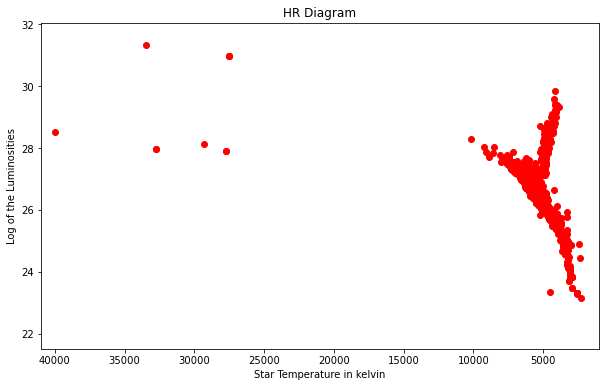

In [9]:
fig, ax = plt.subplots(figsize = (10, 6))
plt.scatter(HZ.st_teff, np.log10(HZ.st_lum), color='red')
plt.xlim(41000, 1000)
plt.title('HR Diagram')
plt.xlabel('Star Temperature in kelvin')
plt.ylabel('Log of the Luminosities')
plt.show()

In [10]:
spec_list_values = HZ.spec_type.values

In [11]:
spec_ty_count = {}

for i in range(65, 87):
    let = chr(i)
    lst = [x for x in spec_list_values if x.startswith(let)]
    if lst:
        spec_ty_count[let] = lst

{'A': ['A8 V',
  'A',
  'A',
  'A',
  'A5',
  'A',
  'A8 V',
  'A2',
  'A8 V',
  'A',
  'A',
  'A',
  'A',
  'A',
  'A8',
  'A7 V',
  'A1 IV-V',
  'A',
  'A'],
 'B': ['B', 'B9.5-A0', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'],
 'F': ['F6 V',
  'F0 IV',
  'F6 V',
  'F9 V',
  'F9 V',
  'F8 IV',
  'F9',
  'F3 V',
  'F',
  'F9 V',
  'F9 V',
  'F8 V',
  'F8 V',
  'F8 V',
  'F8 V',
  'F5 V',
  'F5 V',
  'F5 V',
  'F8',
  'F8 V',
  'F8',
  'F8',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F V',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F',
  'F5 V',
  'F5 V',
  'F5 V',
  'F9 V',
  'F',
  'F8 V',
  'F5 V',
  'F6 V',
  'F',
  'F8',
  'F',
  'F8 V',
  'F8 V',
  'F',
  'F5',
  'F',
  'F',
  'F8',
  'F8',
  'F',
  'F8 IV/V',
  'F7 V',
  'F8 V',
  'F8 V',
  'F8 V',
  'F8 V',
  'F',
  'F8 V',
  'F7 V',
  'F8 V',
  'F',
  

In [13]:
spec_count = {k: len(v) for k, v in spec_ty_count.items()}

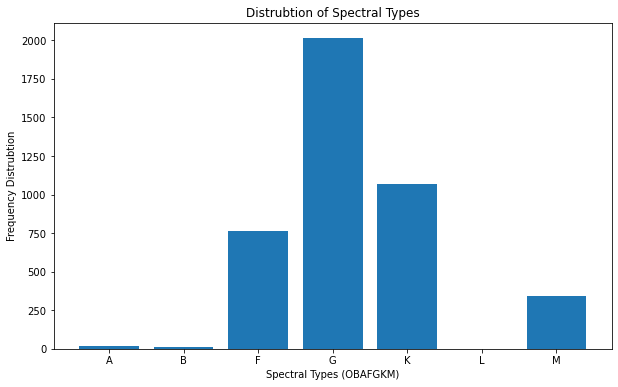

In [14]:
fig, ax = plt.subplots(figsize = (10, 6))
plt.bar(spec_count.keys(), spec_count.values())
plt.title('Distrubtion of Spectral Types')
plt.xlabel('Spectral Types (OBAFGKM)')
plt.ylabel('Frequency Distrubtion')
plt.show()

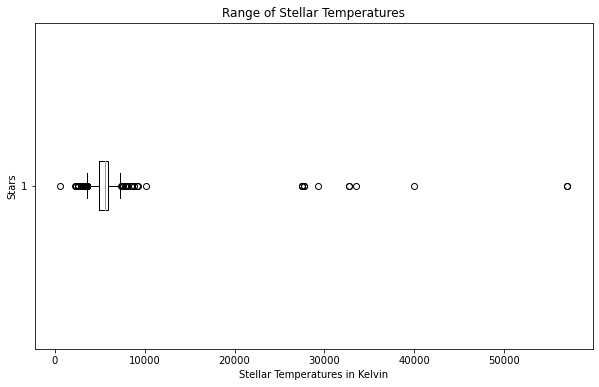

In [18]:
fig, ax = plt.subplots(figsize = (10, 6))
plt.boxplot(HZ.st_teff, vert = False )
plt.title('Range of Stellar Temperatures')
plt.xlabel('Stellar Temperatures in Kelvin')
plt.ylabel('Stars')
plt.show()

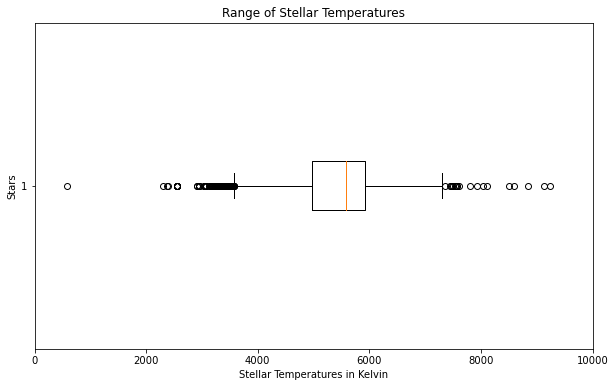

In [20]:
fig, ax = plt.subplots(figsize = (10, 6))
plt.boxplot(HZ.st_teff, vert = False )
plt.xlim(0, 10000)
plt.title('Range of Stellar Temperatures')
plt.xlabel('Stellar Temperatures in Kelvin')
plt.ylabel('Stars')
plt.show()

In [26]:
HZ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4224 entries, 0 to 4223
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pl_name        4224 non-null   object 
 1   pl_orbper_yrs  4224 non-null   float64
 2   st_mass_x      4212 non-null   float64
 3   sy_snum        4224 non-null   int64  
 4   sy_pnum        4224 non-null   int64  
 5   pl_orbper      4224 non-null   float64
 6   pl_orbsmax     4224 non-null   float64
 7   pl_bmasse      1825 non-null   float64
 8   pl_bmassj      1825 non-null   float64
 9   st_teff        4224 non-null   float64
 10  st_mass_y      4212 non-null   float64
 11  st_rad         4224 non-null   float64
 12  ra             4224 non-null   float64
 13  dec            4224 non-null   float64
 14  sy_dist        4131 non-null   float64
 15  spec_type      4224 non-null   object 
 16  st_rad_m       4224 non-null   float64
 17  st_lum         4224 non-null   float64
 18  st_lum_s

In [27]:
heatmapHZ = HZ.drop(columns = ['pl_name', 'spec_type'])

In [29]:
heatmapHZ

,pl_orbper_yrs,st_mass_x,sy_snum,sy_pnum,pl_orbper,pl_orbsmax,pl_bmasse,pl_bmassj,st_teff,st_mass_y,st_rad,ra,dec,sy_dist,st_rad_m,st_lum,st_lum_sol,r_0,r_1
0,0.892621,2.650000,2,1,326.030000,1.250000,5800.150000,18.250000,4742.000,2.650000,19.000,185.178779,17.793252,93.1846,1.321830e+10,6.295337e+28,164.454999,17.615120,12.227205
1,1.413333,2.093333,1,1,516.219985,1.526667,3818.094733,12.013333,4276.500,2.093333,26.935,229.274595,71.823943,125.3210,1.873868e+10,8.368613e+28,218.615798,20.309669,14.097576
2,0.508802,1.700000,1,1,185.840000,0.755000,1271.250000,4.000000,4813.000,1.700000,11.000,352.824150,39.235837,75.4392,7.652700e+09,2.239311e+28,58.498199,10.505901,7.292474
3,4.836797,0.922000,1,1,1766.640004,2.819000,1506.354800,4.739667,5291.000,0.922000,0.965,242.602101,43.816362,17.9323,6.713505e+08,2.516931e+26,0.657505,1.113812,0.773131
4,2.188528,1.025000,3,1,799.360000,1.660200,528.850360,1.664000,5732.750,1.025000,1.130,295.465642,50.516824,21.1397,7.861410e+08,4.756358e+26,1.242518,1.531135,1.062808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219,0.835729,2.300000,1,1,305.250000,1.170000,6149.740000,19.350000,4435.000,2.300000,27.760,107.784723,30.244954,112.5370,1.931263e+10,1.028203e+29,268.600674,22.512080,15.626338
4220,0.012638,1.216667,2,3,4.615874,0.058744,221.177432,0.695920,6152.755,1.216667,1.600,24.198353,41.403815,13.4054,1.113120e+09,1.265272e+27,3.305309,2.497285,1.733444
4221,0.658595,1.225000,2,3,240.552000,0.827693,646.049650,2.032750,6105.510,1.225000,1.600,24.198353,41.403815,13.4054,1.113120e+09,1.226855e+27,3.204951,2.459081,1.706925
4222,3.523723,1.225000,2,3,1287.040000,2.530823,1284.154475,4.040500,6105.510,1.225000,1.600,24.198353,41.403815,13.4054,1.113120e+09,1.226855e+27,3.204951,2.459081,1.706925


In [30]:
corr = HZ.corr()

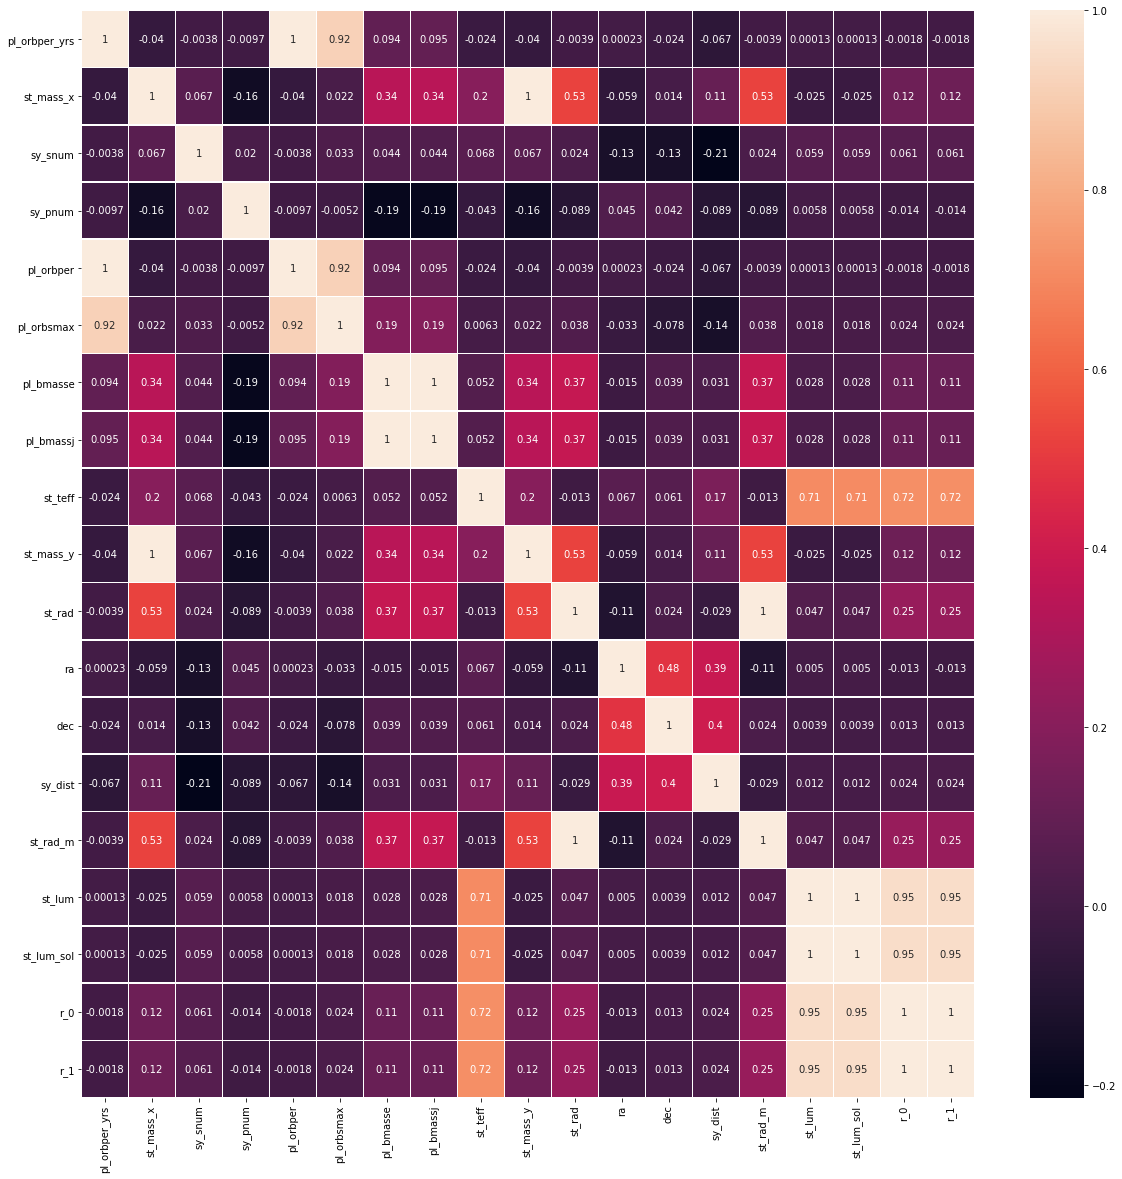

In [34]:
fig, ax=plt.subplots(figsize=(20,20))
ax = sns.heatmap(corr, linewidth=0.5, annot=True)
plt.show()